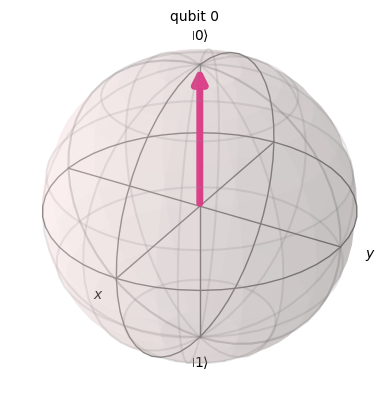

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# 양자회로 생성 및 큐비트 초기화
qc = QuantumCircuit(1, 1)

# 큐비트 시각화
state = Statevector(qc)
plot_bloch_multivector(state)


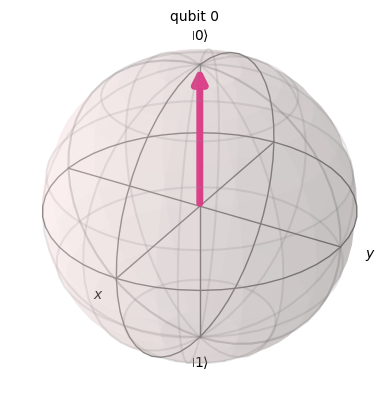

In [2]:
# 큐비트에 T게이트 적용.
qc.t(0)

# 큐비트 시각화.
state2 = Statevector(qc)
plot_bloch_multivector(state2)

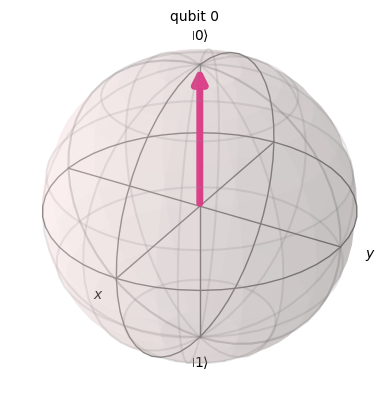

In [3]:
# T 게이트는 블로흐 구 상에서 Z축에 대한 회전 결과를 가지므로,
# 먼저 H 게이트를 적용하면 확인하는데 도움이 됨.
qc2 = QuantumCircuit(1, 1)

# 큐비트 시각화
state2_1 = Statevector(qc)
plot_bloch_multivector(state2_1)

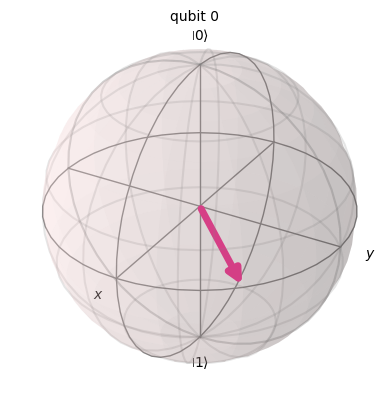

In [4]:
# H게이트 적용 후 T게이트 적용.
qc2.h(0)
qc2.t(0)

# 큐비트 시각화. π/4 만큼 Z축 회전.
state2_2 = Statevector(qc2)
plot_bloch_multivector(state2_2)

In [5]:
import os
from qiskit_ionq import IonQProvider

# IONQ 시뮬레이터 초기화.
api_key = os.getenv("IONQ_API_KEY")
provider = IonQProvider(api_key)
simulator = provider.get_backend("ionq_simulator")

# 측정.
qc2.measure(0, 0)

# 1,000,000번 실행.
job = simulator.run(qc2, shots=1000000)

# 결과출력.
# 예상결과: 50% 의 확률로 0 또는 1.
counts = job.get_counts()
print(counts)

/Users/galaxykkim/ionq-env/lib/python3.11/site-packages/qiskit_ionq/helpers.py:664: UserWarning: Retrying submit_job 4 more time(s) after IonQRetriableError('An unexpected error occurred')
  warnings.warn(
/Users/galaxykkim/ionq-env/lib/python3.11/site-packages/qiskit_ionq/helpers.py:664: UserWarning: Retrying submit_job 3 more time(s) after IonQRetriableError('An unexpected error occurred')
  warnings.warn(
/Users/galaxykkim/ionq-env/lib/python3.11/site-packages/qiskit_ionq/helpers.py:664: UserWarning: Retrying submit_job 2 more time(s) after IonQRetriableError('An unexpected error occurred')
  warnings.warn(
/Users/galaxykkim/ionq-env/lib/python3.11/site-packages/qiskit_ionq/helpers.py:664: UserWarning: Retrying submit_job 1 more time(s) after IonQRetriableError('An unexpected error occurred')
  warnings.warn(


IonQRetriableError: IonQRetriableError('An unexpected error occurred')

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)